### **INTRODUCTION TO COMPUTATIONAL MODELS**
#### **Assigment 4: Support Vector Machines**
- **Universidad de Córdoba**
- **Escuela Politécnica Superior de Córdoba**
- **Computer Science Engineering Degree**
- **Mention: Computation**
- **Fourth year - First quadrimester**
- **Author:** Ventura Lucena Martínez
- **Email:** <i72lumav@uco.es>
---

### **Abstract**
This lab assignment serves to familiarise with support vector machines (SVMs). In
this way, we will use the SVMs for various classification problems, to understand their
behaviour and, above all, the effect of their parameters. To do this, we will use the
[`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm) library, which is one of the most efficient implementations available nowadays,
as well as being free and open source.

### **Introduction**
In this lab assignment, we are going to carry out different exercises to better understand
the behaviour of support vector machines (SVMs) in classification problems. SVMs have
become, since some years ago, the state of the art in pattern recognition problems, and it
is important to know how they work and how they respond to their different parameters.

The lab assignment will be done using the `libsvm` library (included in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)), which is one of the most
popular and efficient implementations available nowadays. In all cases, we will consider
the “C-SVC” version, included in `libsvm`.

### **SVM parameters used**
- $kernel$: function used to project the information into a space of characteristics. When the data is not linearly separable, the kernel function is non linear.
- $C$: regularization parameter. The strength of the regularization is inversely proportional to $C$. Must be positive. The penalty is a quared *l*2 penalty.
- $\gamma$: coefficient for RBF, polynomial and sigmoidal kernels.

See more information [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

### **2D representation of SVMs**
To make the graphic representation in two dimensions from Python, we are going to use the script `libsvm.py`.

#### **Dataset `dataset1.csv`**
Initially, we can see the predetermined SVM with the first dataset `dataset1.csv`. This SVM has the following parameters:
- $kernel$: linear.
- $C$: 1000.

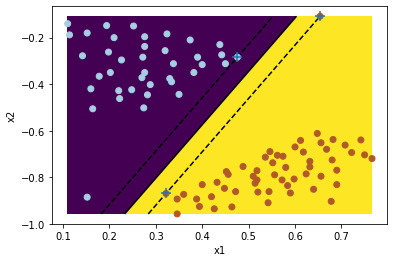

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# Introduce the dataset here:
dataset = '../datasets/csv/dataset1.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train the SVM model.
svm_model = svm.SVC(kernel='linear', C=1000)
svm_model.fit(X, y)

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Plot the support vectors class regions, the separating hyperplane and the margins.
plt.axis('tight')
# |->Plot support vectors.
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

# |-> Extract the limits.
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# |-> Create a grid with all the points and then obtain the SVM score for all the points.
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# |-> Plot the results in a countour.
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, shading='auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

As we can see in the previous figure, we can determine different components in the SVM methodology:
- **Hyperplanes:**
    - $H \equiv w_{1}x_{1}+w_{2}x_{2}+b = 0 \rightarrow$ Hyperplane that divides the purple and yellow regions.
    - $H^{+} \equiv w_{1}x_{1}+w_{2}x_{2}+b \geq 1 \rightarrow$ Hyperplane that defines the positive class. Anything on or above this boundary has label 1.
    - $H^{-} \equiv w_{1}x_{1}+w_{2}x_{2}+b \leq -1 \rightarrow$ Hyperplane that defines the negative class. Anything on or above this boundary has label -1.
- **Support Vectors**: points that make up the two lines parallel to the hyperplane $H$, beeing the distance between them (margin) the greatest possible.
- **Margin**: distance between a suppor vector and the hyperplane $H$.

After this first execution, we are supressing the code lines corresponding to the SVM's graphical representation, just to see the points of the dataset:

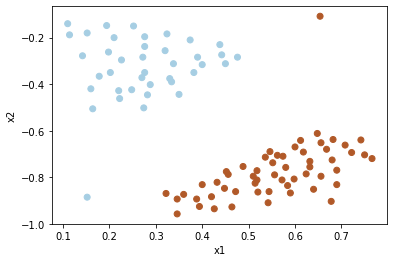

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Introduce the dataset here:
dataset = '../datasets/csv/dataset1.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Intuitively, if we want to make the smallest possible mistake when separating the elements of the graph with an hyperplane, the solution would be, more or less accurate, as follows:

![Intuitively discrimination of the data](figures/Figure_1.png "Figure 1")

Let's try to use different values for parameter $C \in \{10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}, 10^{3}, 10^{4}\}$ . We have to note that a very big value of $C$ will result in an SVM that will make the minimum possible number of errors, while a small value of $C$ will favour a classifier with the maximum margin, even if errors are made. Of course, this is related to the possible over-fitting (learning noisy training patterns that can mislead the model):

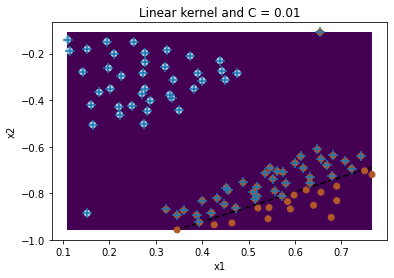

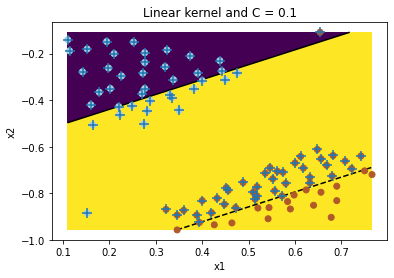

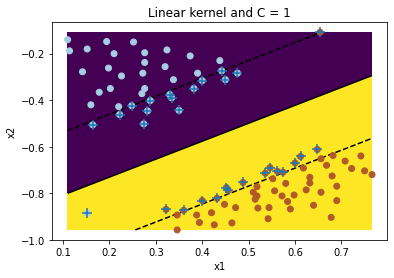

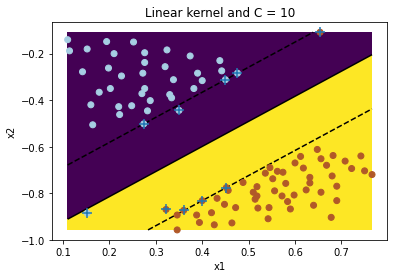

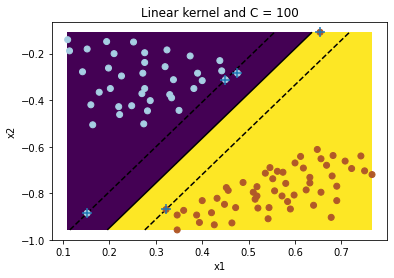

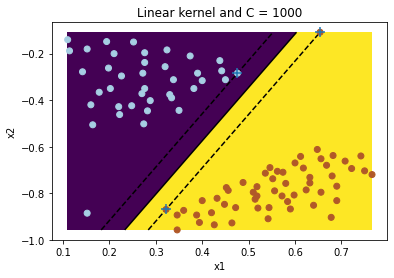

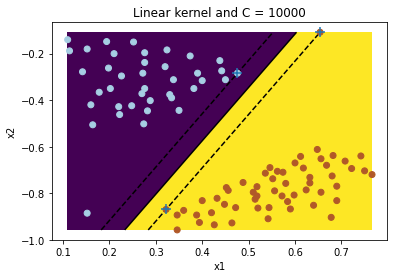

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# Introduce the dataset here:
dataset = '../datasets/csv/dataset1.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(-2, 5):
    # Train the SVM model.
    svm_model = svm.SVC(kernel='linear', C=10 ** i)
    svm_model.fit(X, y)

    # Plot the points.
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins.
    plt.axis('tight')
    # |->Plot support vectors.
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

    # |-> Extract the limits.
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # |-> Create a grid with all the points and then obtain the SVM score for all the points.
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # |-> Plot the results in a countour.
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Linear kernel and C = {10 ** i}')

    plt.show()

Taking a look at the previous plots, we can observe that not all the patterns are correctly classified until $C$ doesn't reach the value 1000, with a more restricted margin compared to the previous plot with $C$ value equal to 100, where the margin is wider, but with a wrong classified pattern.

#### **Dataset `dataset2.csv`**
In this case, we are running a linear SVM with the previous set of values for the $C$ parameter to see if we get any satisfactory results in the sense that there are no errors in the training set: 

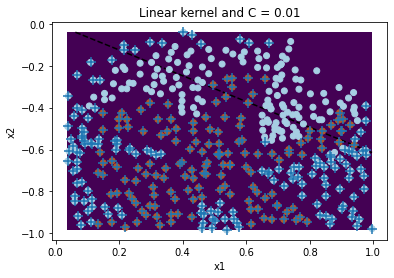

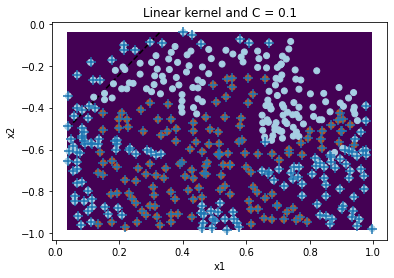

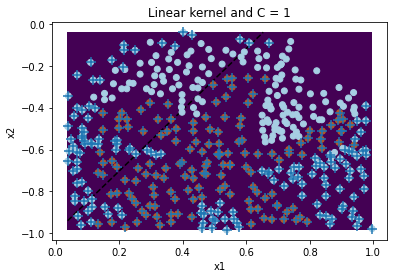

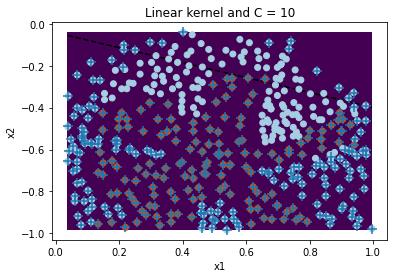

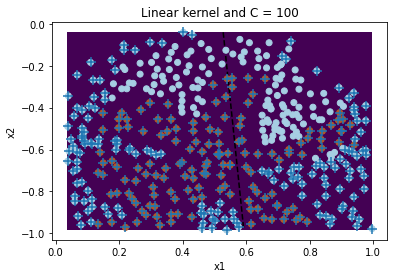

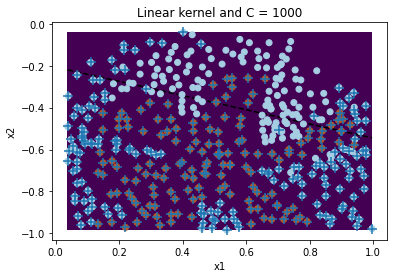

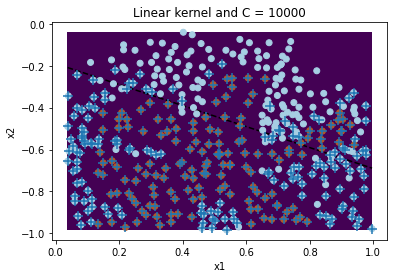

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# Introduce the dataset here:
dataset = '../datasets/csv/dataset2.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(-2, 5):
    # Train the SVM model.
    svm_model = svm.SVC(kernel='linear', C=10 ** i)
    svm_model.fit(X, y)

    # Plot the points.
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins.
    plt.axis('tight')
    # |->Plot support vectors.
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

    # |-> Extract the limits.
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # |-> Create a grid with all the points and then obtain the SVM score for all the points.
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # |-> Plot the results in a countour.
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Linear kernel and C = {10 ** i}')

    plt.show()

As we can see, no value for the parameter $C$ satisfies a good classification for the set of patterns. The reason is that the data is not linearly separable, so that, what we have to modify to correct this is not only the $C$ parameter, but also the $kernel$. To achieve non-linear separating hyperplanes, SVMs use the so-called kernel trick which, explained informally, builds a linear model in a many-dimensional space and projects it back to the original space, resulting in a non-linear model. This is achieved through the use of kernel functions applied to each of the training patterns. The most common one is the RBF kernel, also called Gaussian. In order to apply it, we have to specify an additional parameter ($gamma = \gamma = \frac{1}{radius}$). A high radius tends to softer solutions, with less over-fitting, while a small radius tends to produce more over-fitting. Running the algorithm with the following set of values for $\gamma \in \{10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}, 10^{3}, 10^{4}\}$ and the best selected $C = 1000$:

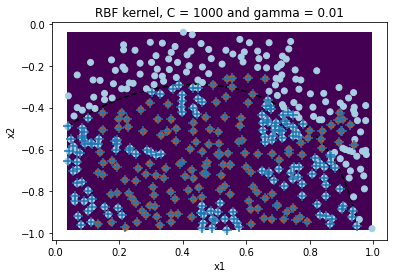

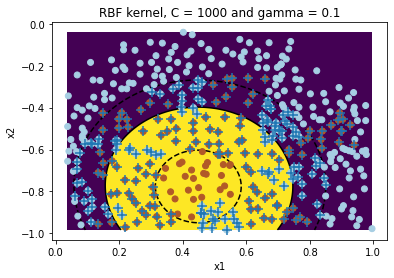

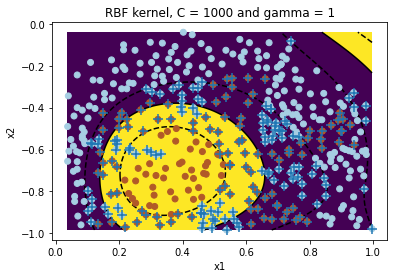

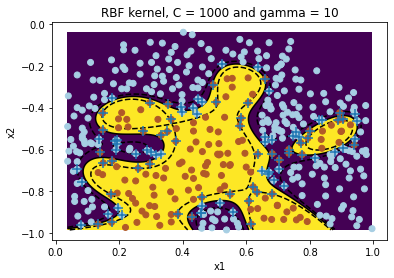

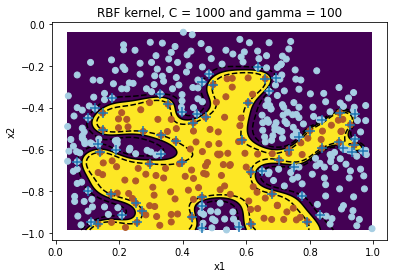

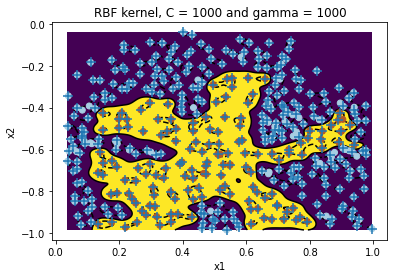

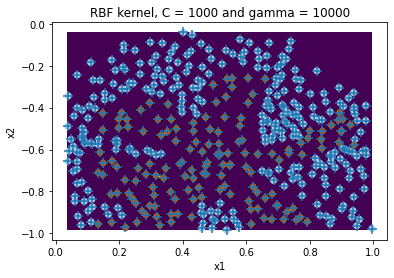

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# Introduce the dataset here:
dataset = '../datasets/csv/dataset2.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(-2, 5):
    # Train the SVM model.
    svm_model = svm.SVC(kernel='rbf', C= 1000, gamma=10 ** i)
    svm_model.fit(X, y)

    # Plot the points.
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins.
    plt.axis('tight')
    # |->Plot support vectors.
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

    # |-> Extract the limits.
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # |-> Create a grid with all the points and then obtain the SVM score for all the points.
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # |-> Plot the results in a countour.
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'RBF kernel, C = 1000 and gamma = {10 ** i}')

    plt.show()

The results are as follows:

| $kernel=RBF$, $C=1000$ |    Result   |
|:----------------------:|:-----------:|
| $\gamma=10^{-2}$       | Underfitted |
| $\gamma=10^{-1}$       | Underfitted |
| $\gamma=10^{0}$        | Underfitted |
| $\gamma=10^{1}$        |   Adjusted  |
| $\gamma=10^{2}$        |  Overfitted |
| $\gamma=10^{3}$        |  Overfitted |
| $\gamma=10^{4}$        |  Overfitted |

#### **Dataset `dataset3.csv`**